In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Interpretacja modeli: metody model-agnostic

In [6]:
from sklearn.datasets import load_boston

In [7]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
X = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)

In [10]:
y = load_boston().target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
reg_rf = RandomForestRegressor(n_estimators=100)
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
y_pred = reg_rf.predict(X_test)

In [17]:
mse = np.mean((y_pred - y_test)**2)
mse

10.848868764705877

In [18]:
rmse = mse ** 0.5
rmse   # model mylił się o około tyle dolarów średnio o 3 tysiące dolarów - dosyć dokłądnie przeywidkemu cene tych domów 

3.293762098984363

## 1.1. PDP - Partial Dependence Plot 

https://christophm.github.io/interpretable-ml-book/pdp.html

#### Zadanie

Zaimplementuj swoją funkcję do określania PD Plots.

1. Pozyskaj nauczony model na którym będziesz przeprowadzał predykcje oraz numer/nazwę zmiennej V, dla której będzie wyliczany PDP.
2. Zbuduj s-elementową siatkę wartości dla zmiennej, którą badasz. 
2. Dla każdej próbki w zbiorze (lub dla n wylosowanych spośród wszystkich próbek):

    2.1. Zamień wartość zmiennej V na przygotowaną siatkę, tworząc tym samym s póbek, różniących się jedynie wartością zmiennej V. 
    
    2.2. Wykonaj predykcję dla każdej próbki, uzyskując s-elementowy wektor y_pred.
    
    2.3. Zapisz wyniki predykcji.
    
3. Oblicz wartość średnią predykcji dla każdej wartości zmiennej V z s-elementowej siatki.

In [19]:
from sklearn.inspection import plot_partial_dependence

c:\users\basia\appdata\local\programs\python\python38\lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:321: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


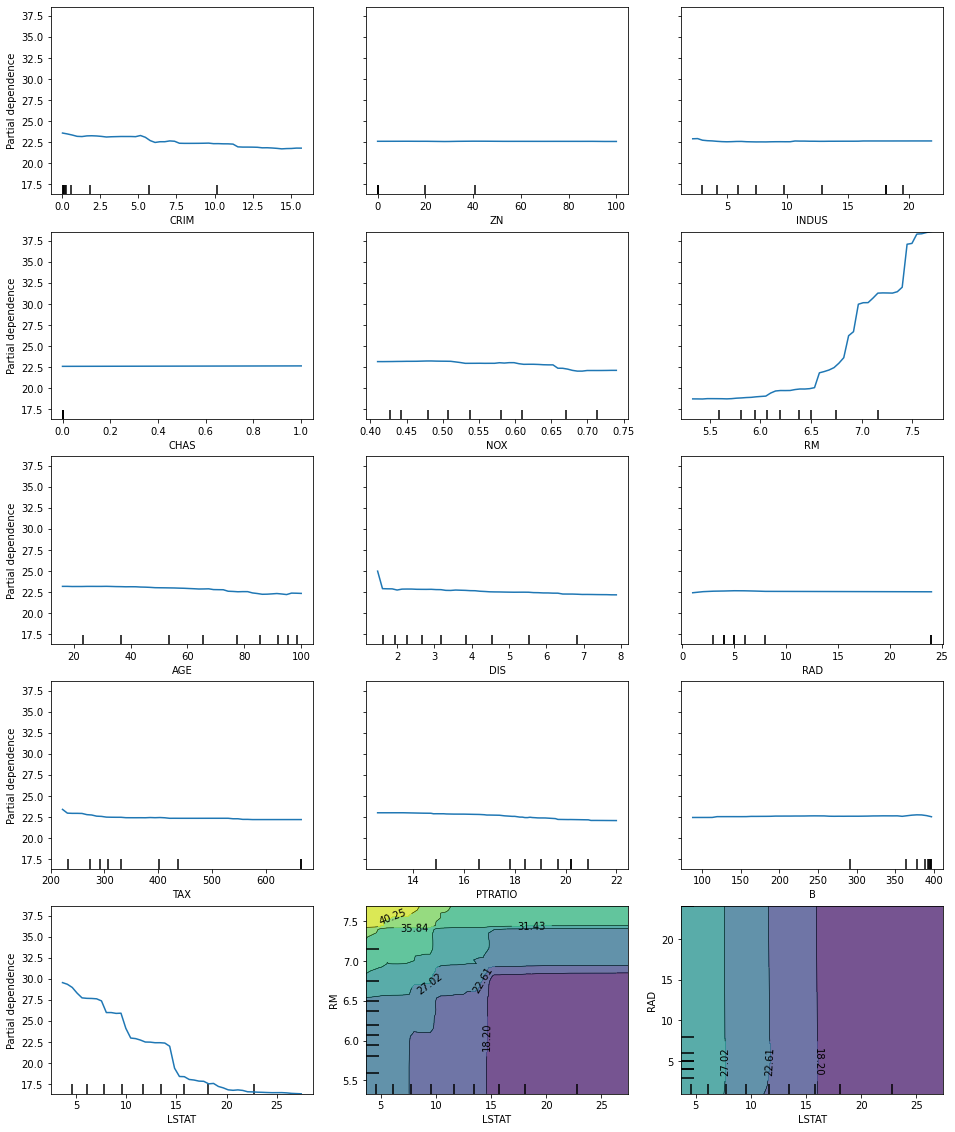

In [27]:
features = X.columns.tolist()
features.append(('LSTAT', 'RM'))
features.append(('LSTAT', 'RAD'))

fig = plt.figure(figsize=(16, 20))
plot_partial_dependence(reg_rf, X_train, features=features, feature_names=features, grid_resolution=50, fig=fig)

# np. widac ze jak cena pokoi rosnie to cena rosnie - wykres rm 

INTERPRETACJA PDP:
1. ZMIENNA LSTAT I LM USREDNIAJAC WYWOŁUJĄ NAJWIĘKSZE ZMIANY W WARTOŚCIACH PREDYKOWANYCH PRZEZ MODEL
2. DLA MAPY KONTUROWEJ LSTAT VS. RM MOZENA ZAUWAZYC ZE :
   - PREDYKCJE DLA DOMÓW O DUŻEJ LICZBIE POKOI SĄ MNIEJ ZALEŻNE OD ZMIENNEJ LSTAT
   - DOMY POŁOŻONE W LEPSZYCH DZIELNIACH SĄ WYCENIANE PODOBNIE PRZEZ MODEL I SĄ ZMNIEJ ZALEŻNE OD ZMIENNEJ RM 

In [37]:
def sample_space(feature_values, feature_type, sample_resolution):
    #dla zminnych ciągłych
    if feature_type== 'cont':
        val_min = feature_values.min()
        val_max = feature_values.max()
        sampled_values = np.linspace(start=val_min, stop=val_max, num=sample_resolution)
   
    # dla zmiennych dyskretnych
    elif feature_type == 'dis':
        sampled_values = np.unique(feature_values, return_index=False)
        
    else:
        raise Exception('Wrong feature type')
    
    return sampled_values

In [38]:
sample_space(np.array([1, 2, 3, 4, 4, 3]), 'dis', 10)

array([1, 2, 3, 4])

In [53]:
def pdp(model, X, feature_number, feature_name, feature_type, sample_resolution=100):
    
    #stwórz siatkę wartości dla badanej zmiennej
    sampled_values = sample_space(feature_values=X[:, feature_number], 
                                  feature_type=feature_type, 
                                  sample_resolution= sample_resolution)
    
    # korekta sample_resolution ze względu na możliwość ograniczenia długości wektora w przypadku zmiennej dyskretnej
    sample_resolution = sampled_values.shape[0]
    
    # stwórz pusty kontener ns poszerzony zbiór próbek 
    stacked_instances = np.empty((0, X.shape[1]), float)
    
    # stwórz macierz z pozstałymi zmiennymi 
    other_features = np.delete(X, feature_number, axis=1)
    
    # iteruj dla każdej próbki w pomnijszonym zbiorze danych :
    
    for i, row in enumerate(other_features):
        
        # skopiuj wiersz sample_resolution  - razy 
        
        copied_instances = np.repeat(row.reshape((1, -1)),
                                    sample_resolution,
                                    axis=0)
        
        
        # wstaw kolumnę z siatką wartości badanej zmiennej 
        
        concat_instances = np.insert(copied_instances, 
                                     feature_number, 
                                     sampled_values.ravel(), 
                                     axis=1)
        
        # apenduj kontener
        
        stacked_instances = np.append(stacked_instances, concat_instances, axis=0)
        
        # wykonaj predykcję dla całego powiększonego zbioru
        
        y_pred = model.predict(stacked_instances)
        
        # stwórz dataframe'a z kolumną badanej zmiennej oraz opowiadającymi jej predykcjami
        
        feature_results = pd.DataFrame({feature_name: stacked_instances[:, feature_number],'y': y_pred})
        
        # dla każdej unikalnej wartości badanej zmiennej wylicz średnie predykcje 
        
        mean_y = feature_results.groupby([feature_name]).mean()
    return mean_y

In [54]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:xlabel='RM'>

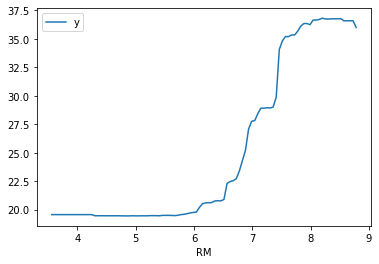

In [56]:
pdp_df = pdp(reg_rf, X.values, feature_number=5, feature_name="RM", feature_type='cont')

pdp_df.plot()

In [61]:
features_to_types = {
    'CRIM': 'cont',
    'ZN': 'cont',
    'INDUS': 'cont',
    'CHAS': 'dis',
    'NOX': 'cont',
    'RM': 'cont',
    'AGE': 'cont',
    'DIS': 'cont',
    'RAD': 'cont',
    'TAX': 'cont',
    'PTRATIO': 'cont',
    'B': 'cont',
    'LSTAT': 'cont'
}
# słownik pokazuje jakie mamy tu zmienne czy liczebne czy dyskretne

KeyboardInterrupt: 

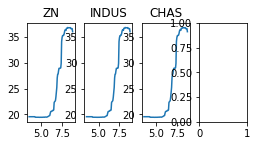

In [59]:
for i in range (1, 13):
    plt.subplot(2, 6, i)
    feature_name=X.columns[i]
    
    pdp.df = pdp(reg_rf, 
                 X.values, 
                 feature_number=i,
                feature_name=feature_name,
                feature_type=features_to_types[feature_name],
                sample_resolution=100)
    
    plt.plot(pdp_df.index, pdp_df.y)
    plt.title(feature_name)

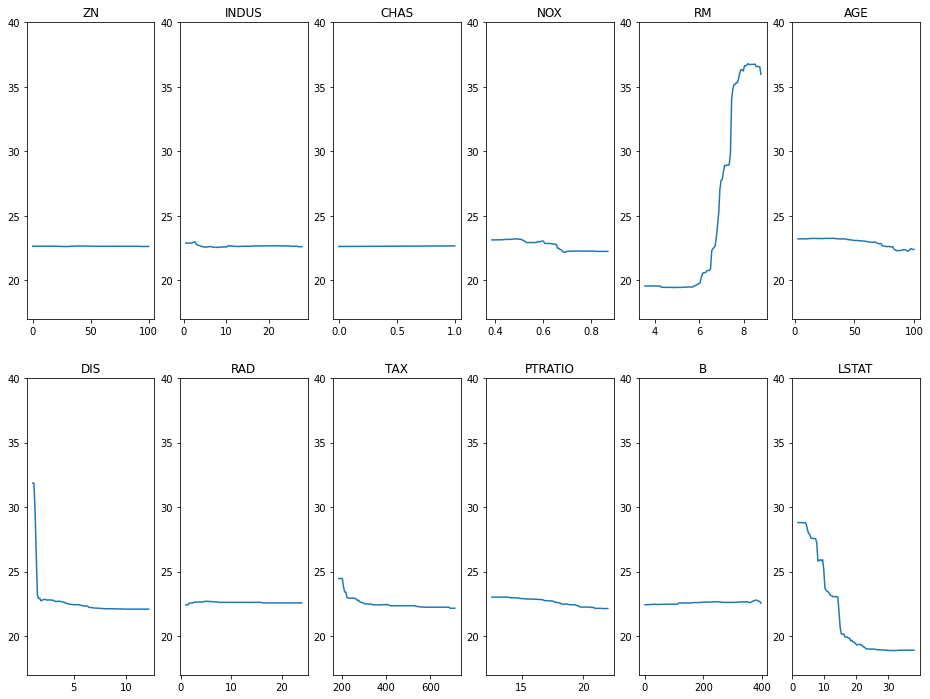

In [64]:
plt.figure(figsize=(16, 12))
for i in range(1, 13):
    plt.subplot(2, 6, i)
    feature_name=X.columns[i]
    pdp_df = pdp(reg_rf,
                 X.values,
                 feature_number=i,
                 feature_name=feature_name,
                 feature_type=features_to_types[feature_name],
                 sample_resolution=100)
    plt.ylim(17, 40)
    plt.plot(pdp_df.index, pdp_df.y)
    plt.title(feature_name)

    # przerwałam, za dłgo się robiło

## 1.2. ICE  Plot - Individual Conditional Expectation Plot 

https://christophm.github.io/interpretable-ml-book/ice.html

Brak implementacji w scikit-learnie.

#### Zadanie

Zaimplementuj swoją funkcję do określania ICE Plots. 

Dla jasności załóżmy, że mamy m próbek w zbiorze danych.

1. Pozyskaj nauczony model na którym będziesz przeprowadzał predykcje oraz numer/nazwę zmiennej V, dla której będzie wyliczany PDP.
2. Zbuduj s-elementową siatkę wartości dla zmiennej, którą badasz. 
2. Dla każdej próbki w m-elementowym zbiorze (lub dla n wylosowanych spośród wszystkich próbek):

    2.1. Zamień wartość zmiennej V na przygotowaną siatkę, tworząc tym samym s póbek, różniących się jedynie wartością zmiennej V. 
    
    2.2. Wykonaj predykcję dla każdej próbki, uzyskując s-elementowy wektor y_pred.
    
    2.3. Zapisz wyniki predykcji.
    
3. Wyświetl wszystkie m krzywych (pojedyncza krzywa jest złożona z rozszerzonej przez siatkę jednej badanej próbki)

In [ ]:
def ice(model,
       X,
       feature_number,
       feature_name,
       feature_type,
       sample_resolution=100):
    # Stwórz siatkę wartości dla badanej zmiennej
    sampled_values = sample_space(feature_values=X[:, feature_number],
                                  feature_type=feature_type,
                                  sample_resolution=sample_resolution)
    # Korekta sample_resolution ze względu na możliwość ograniczenia długości
    # wektora w przypadku zmiennej dyskretnej.
    sample_resolution = sampled_values.shape[0]
    # Stwórz pusty kontener na poszerzony zbiór próbek
    stacked_instances = np.empty((0, X.shape[1]), float)
    # stwórz kontener przechowujący informacje, z której próbki pochodzi wiersz w stacked_instances
    row_indicators = []
    # Stwórz macierz z pozostałymi zmiennymi
    other_features = np.delete(X, feature_number, axis=1)
    # Iteruj dla każdej próbki w pomniejszonym zbiorze danych:
    for i, row in enumerate(other_features):
        # Skopiuj wiersz sample_resolution-razy
        copied_instances = np.repeat(row.reshape((1, -1)),
                                    sample_resolution,
                                    axis=0)
        # Wstaw kolumnę z siatką wartości badanej zmiennej
        concat_instances = np.insert(copied_instances,
                                    feature_number,
                                    sampled_values.ravel(),
                                    axis=1)
        # Appenduj kontener
        stacked_instances = np.append(stacked_instances,
                                     concat_instances,
                                     axis=0)
        # Dołącz do listy indeksy przetwarzanej próbki
        row_indicators += (np.ones(sample_resolution) * i).ravel().tolist()
    # Wykonaj predykcje dla całego powiększonego zbioru
    y_pred = model.predict(stacked_instances)
    # Stwórz dataframe'a z kolumną badanej zmiennej oraz odpowiadajaceymi jej predykcjami
    feature_results = pd.DataFrame({
        feature_name: stacked_instances[:, feature_number],
        'y': y_pred,
        'row_id': row_indicators
    })
    # Stwórz dataframe'a z kolumną zawierającą siatkę wartości badanej zmiennej i ustaw ją jako indeks
    samples_groups_df = pd.DataFrame({
        feature_name: sampled_values
    })
    samples_groups_df.set_index(feature_name, drop=True, inplace=True)
    # dla każdej z oryginalnych próbek:
    for slice_num in range(X.shape[0]):
        samples_groups_df[str(slice_num)] = feature_results[feature_results['row_id'] == slice_num]['y'].values
    return samples_groups_df






## 1.4. Permutation Feature Importance

https://christophm.github.io/interpretable-ml-book/feature-importance.html

Zaimplementowane dopiero w sklearn 0.22.

In [68]:
import sklearn
sklearn.__version__

'0.23.2'

#### Zadanie

Zaimplementuj swoją funkcję do określania permutation feature importance.

Logika metody:
1. Wylicz błąd predykcji dla całego zbioru danych (dla wszystkihc zmiennych).
2. Dla każdej kolumny w zmiennych objaśniających:
    
    2.1. Dla jednej zmiennej wykonaj k-krotnie:
        2.1.1. Permutuj wartości i-tej zmiennej, zwyrając zależność między ocenianą zmienną a targetem.
        2.1.2. Wykonaj predykcję.
        2.1.3. Oblicz błąd predykcji i dodaj go do puli błędów.
        2.1.4. Oblicz względny przyrost błędu i dodaj go do puli przyrostów dla i-tej zmiennej.
3. Narysuj wykres pudełkowy opisujący rozkłady przyrostów błędów dla każdej zmiennej.

In [71]:

def pfi(model, X, y, feature_number, error_func, permut_number=100):
    # wylicz oryginalne predykcje
    y_pred = model.predict(X)
    # wyznacz błąð na oryginalnych danych
    error = error_func(y.ravel(), y_pred.ravel())
    # stwórz kontener na błędy predykcji
    scores = []
    for i in  range(permut_number):
        # skopiuj zbiór X
        X_shuff = X.copy()
        # permutuj wartości wybranej zmiennej
        X_shuff[:, feature_number] = np.random.permutation(X_shuff[:, feature_number])
        # wyznacz błąd predykcji
        score = error_func(y.ravel(), model.predict(X_shuff).ravel())
        scores.append(score)
    # wylicz względny błąd
    importances = (np.array(scores) - error) / error
    return importances

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
pfi_arr = pfi(reg_rf,
              X_train.values,
              y_train,
              feature_number=5,
              error_func=mean_absolute_error,
              permut_number=1000)

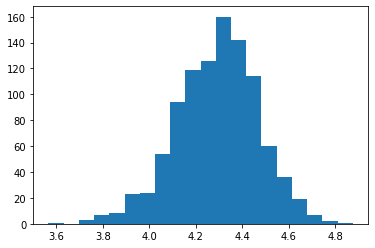

In [74]:
_ = plt.hist(pfi_arr, bins=20)

In [75]:
pfi_arr.mean()

4.292347656054749

In [79]:
permut_number = 200
pfi_all = np.zeros((permut_number, X.shape[1]))

for i, col in enumerate(X.columns):
    print(col)
    
    pfi_all[:, i] = pfi(reg_rf,
              X_train.values,
              y_train,
              feature_number=5,
              error_func=mean_absolute_error,
              permut_number=permut_number)
    
pfi_df = pd.DataFrame(pfi_all, columns=X.columns)

CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


In [80]:
pfi_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,4.352043,4.160543,4.251975,4.315688,4.085034,4.051439,4.363325,4.506047,4.035808,4.175275,4.071631,4.494250,4.229040
1,4.649762,4.505806,4.522166,4.003308,4.601134,4.510713,4.558139,4.460756,4.603124,4.215305,4.402312,4.282120,4.402336
2,4.252443,4.117828,4.409960,4.232730,3.955867,4.249502,4.198824,4.335606,4.118816,4.286472,4.075580,4.379336,4.516800
3,4.369877,4.460782,4.064624,4.401130,4.403462,4.198630,4.283244,4.613019,4.489451,4.342010,4.456433,4.398422,4.329705
4,4.401983,4.447642,4.208622,4.326400,4.069252,4.443654,4.323359,4.750033,4.300836,4.298972,3.914878,4.413892,4.321175


Text(0.5, 1.0, 'Permutation Importance')

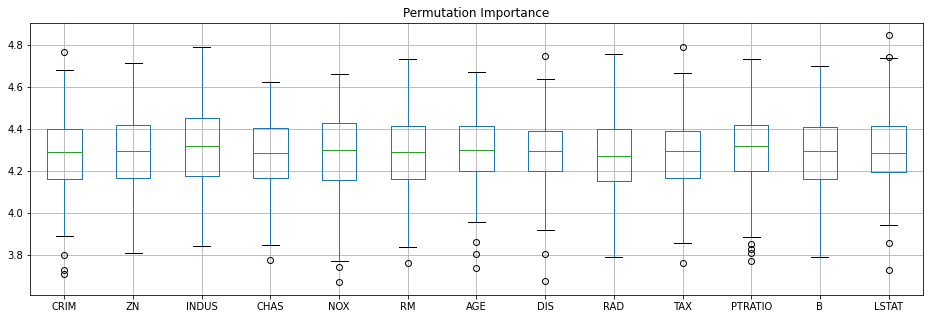

In [81]:
pfi_df.boxplot(figsize=(16, 5))
plt.title('Permutation Importance')

In [82]:
pfi_df.mean()

CRIM       4.280301
ZN         4.293922
INDUS      4.309493
CHAS       4.278614
NOX        4.279330
RM         4.291612
AGE        4.301330
DIS        4.295903
RAD        4.285552
TAX        4.286169
PTRATIO    4.305194
B          4.289659
LSTAT      4.300599
dtype: float64

# 2. Predykcja szeregów czasowych

In [83]:
dataset = pd.read_csv('Dane/dataset_PSE.csv')

In [84]:
dataset

,indeks,Data,Godzina,ZAP
0,2,20160101,3,13841.413
1,3,20160101,4,13375.913
2,4,20160101,5,13163.563
3,5,20160101,6,13132.988
4,6,20160101,7,13185.875
...,...,...,...,...
19664,19698,20180331,20,18069.175
19665,19699,20180331,21,18219.463
19666,19700,20180331,22,17424.750
19667,19701,20180331,23,16545.325


In [85]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19669 entries, 0 to 19668
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   indeks   19669 non-null  int64  
 1   Data     19669 non-null  int64  
 2   Godzina  19669 non-null  int64  
 3   ZAP      19669 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 614.8 KB


<AxesSubplot:>

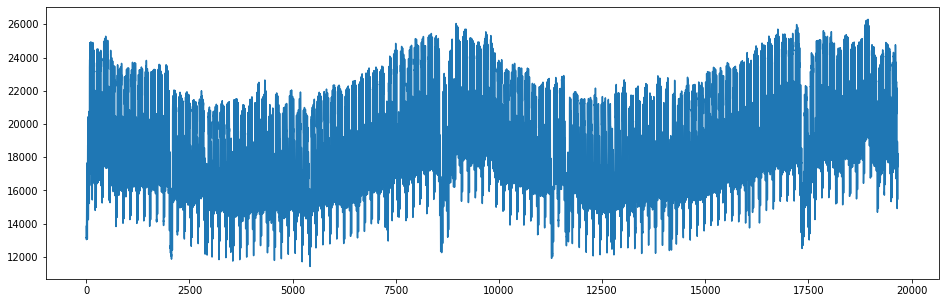

In [86]:
# zobaczmy jak wygląda wykres zapotrzebowania 

dataset['ZAP'].plot(figsize=(16, 5))

In [87]:
dataset.Godzina.unique() 

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24,  1,  2], dtype=int64)

przesuwamy godzinę o godzinę w tył

In [88]:
dataset.Godzina = dataset.Godzina - 1 

In [93]:
from datetime import datetime

In [97]:
datetime.strptime('201803313', '%Y%m%d%H')

datetime.datetime(2018, 3, 31, 3, 0)

In [98]:
dataset['Czas'] = dataset['Data'].astype(str) + dataset['Godzina'].astype(str)
dataset

,indeks,Data,Godzina,ZAP,Czas
0,2,20160101,2,13841.413,201601012
1,3,20160101,3,13375.913,201601013
2,4,20160101,4,13163.563,201601014
3,5,20160101,5,13132.988,201601015
4,6,20160101,6,13185.875,201601016
...,...,...,...,...,...
19664,19698,20180331,19,18069.175,2018033119
19665,19699,20180331,20,18219.463,2018033120
19666,19700,20180331,21,17424.750,2018033121
19667,19701,20180331,22,16545.325,2018033122


In [ ]:
dataset.set_index(pd.to_datetime)

#### Zadanie
1. Uzupełnij brakujący dzień dniem 'statystycznym'
2. Uzupełnij brakujące pojedyncze wartości interpolacją liniową

##### Walidacja krzyżowa dla szeregów czasowych

<img src="Grafika/tscv.png">

<br>

<br>

<br>
Źródło: 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py